In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.integrate import quad
import scipy.linalg as la
import networkx as nx
import seaborn as sns
import pandas as pd
import graphs as g

In [2]:
#2D Grid Graph
grid_graph = nx.grid_2d_graph(5,5)

#Dolphins Graph
dolphins_graph = nx.read_gml("00-graphs/dolphins.gml")

#Davis Southern women social network
Davis_Southern_graph=nx.davis_southern_women_graph()

#Florentine families graph
florentine_families_graph=nx.florentine_families_graph()

#Karate graph
Zachary_graph=nx.karate_club_graph()

#Taro Graph
taro_graph = g.taro_graph()

In [5]:
# 2D Grid

A_2Dgrid = (nx.adjacency_matrix(grid_graph)).todense()
D_2Dgrid = np.diag(np.asarray(sum(A_2Dgrid))[0]) 

eigenvalues_2Dgrid, eigenvectors_2Dgrid = la.eig(D_2Dgrid - A_2Dgrid)

r_eigenv_2Dgrid = sorted(zip(eigenvalues_2Dgrid.real, eigenvectors_2Dgrid.T), key=lambda x: x[0])


# Dolphins

A_Dol = (nx.adjacency_matrix(dolphins_graph)).todense()
D_Dol = np.diag(np.asarray(sum(A_Dol))[0]) 

eigenvalues_Dol, eigenvectors_Dol = la.eig(D_Dol - A_Dol)

r_eigenv_Dol = sorted(zip(eigenvalues_Dol.real,
                          eigenvectors_Dol.T), key=lambda x: x[0])

# Taro

A_taro = (nx.adjacency_matrix(taro_graph)).todense()
D_taro = np.diag(np.asarray(sum(A_taro))[0]) 

eigenvalues_taro, eigenvectors_taro = la.eig(D_taro - A_taro)
r_eigenv_taro = sorted(zip(eigenvalues_taro.real,
                           eigenvectors_taro.T), key=lambda x: x[0])

# Zachary

A_Zachary = (nx.adjacency_matrix(Zachary_graph)).todense()
D_Zachary = np.diag(np.asarray(sum(A_Zachary))[0]) 

eigenvalues_Zachary, eigenvectors_Zachary = la.eig(D_Zachary - A_Zachary)
r_eigenv_Zachary = sorted(zip(eigenvalues_Zachary.real,
                              eigenvectors_Zachary.T), key=lambda x: x[0])


# A Davis

A_Davis = (nx.adjacency_matrix(Davis_Southern_graph)).todense()
D_Davis = np.diag(np.asarray(sum(A_Davis))[0]) 

eigenvalues_Davis, eigenvectors_Davis = la.eig(D_Davis - A_Davis)
r_eigenv_Davis = sorted(zip(eigenvalues_Davis.real,
                          eigenvectors_Davis.T), key=lambda x: x[0])

# Florentine Families

A_florentine = (nx.adjacency_matrix(florentine_families_graph)).todense()
D_florentine = np.diag(np.asarray(sum(A_florentine))[0]) 

eigenvalues_florentine, eigenvectors_florentine = la.eig(D_florentine - A_florentine)
r_eigenv_florentine = sorted(zip(eigenvalues_florentine.real,
                          eigenvectors_florentine.T), key=lambda x: x[0])

In [3]:
graphs_list = [grid_graph, dolphins_graph, taro_graph,
               Zachary_graph, Davis_Southern_graph, 
               florentine_families_graph]

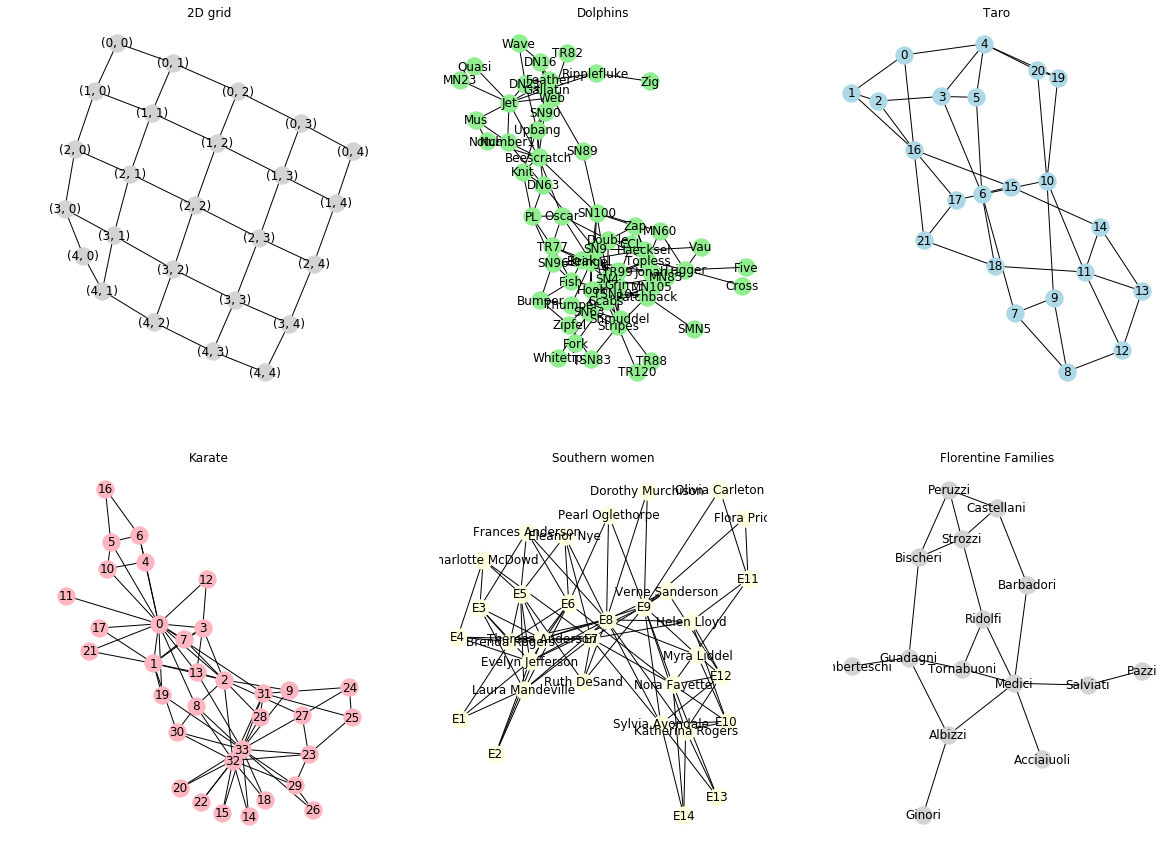

In [4]:
g.savage_plot(graphs_list)

In [6]:
v_ri = g.normalize_eigenv(sorted(r_eigenv_Zachary[1][1], key=lambda x: x))
v_rj = g.normalize_eigenv(sorted(r_eigenv_Davis[1][1], key=lambda x: x))

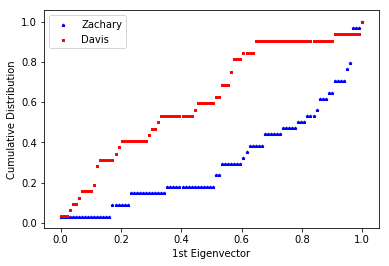

In [7]:
y=np.linspace(0,1, num=100)
plt.scatter(y ,g.cdf(len(r_eigenv_Zachary),y,
                   g.normalize_eigenv(sorted(r_eigenv_Zachary[1][1], key=lambda x: x))),
            c='b', marker='*', s=8,label='Zachary')
plt.scatter(y, g.cdf(len(r_eigenv_Davis),y,
                   g.normalize_eigenv(sorted(r_eigenv_Davis[1][1], key=lambda x: x))),
            c='r', marker='s',s=8, label='Davis')
plt.xlabel("1st Eigenvector")
plt.ylabel("Cumulative Distribution")
plt.legend(loc='upper left')
plt.show()

In [8]:
reign_lists = [r_eigenv_2Dgrid, r_eigenv_Dol, r_eigenv_taro,
               r_eigenv_Zachary, r_eigenv_Davis, r_eigenv_florentine]

In [9]:
dist_matrix = g.sgd_matrix(reign_lists)

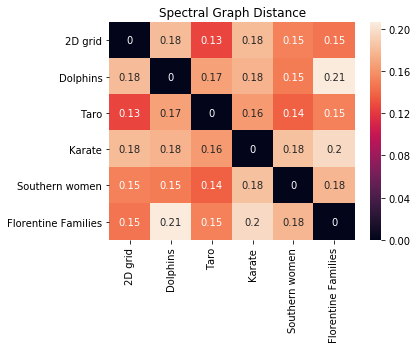

In [10]:
graphs_names = ["2D grid", "Dolphins", "Taro", "Karate",
                "Southern women", "Florentine Families"]

plt.figure(figsize=(5.5,4))
sns.heatmap(pd.DataFrame(dist_matrix,
                         index = graphs_names, 
                         columns = graphs_names),
            annot=True)
plt.title('Spectral Graph Distance')
plt.show()